<a href="https://colab.research.google.com/github/aryanchakravorty/CampusPulseInitiative/blob/main/campusPulseInitiative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1142]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1143]:
df=pd.read_csv("/content/sample_data/Dataset.csv")
df

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,NaN,15,15.0,16,18.0,2.0,1.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,NaN,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,NaN,1.0,4.0,no


# **LEVEL 1**

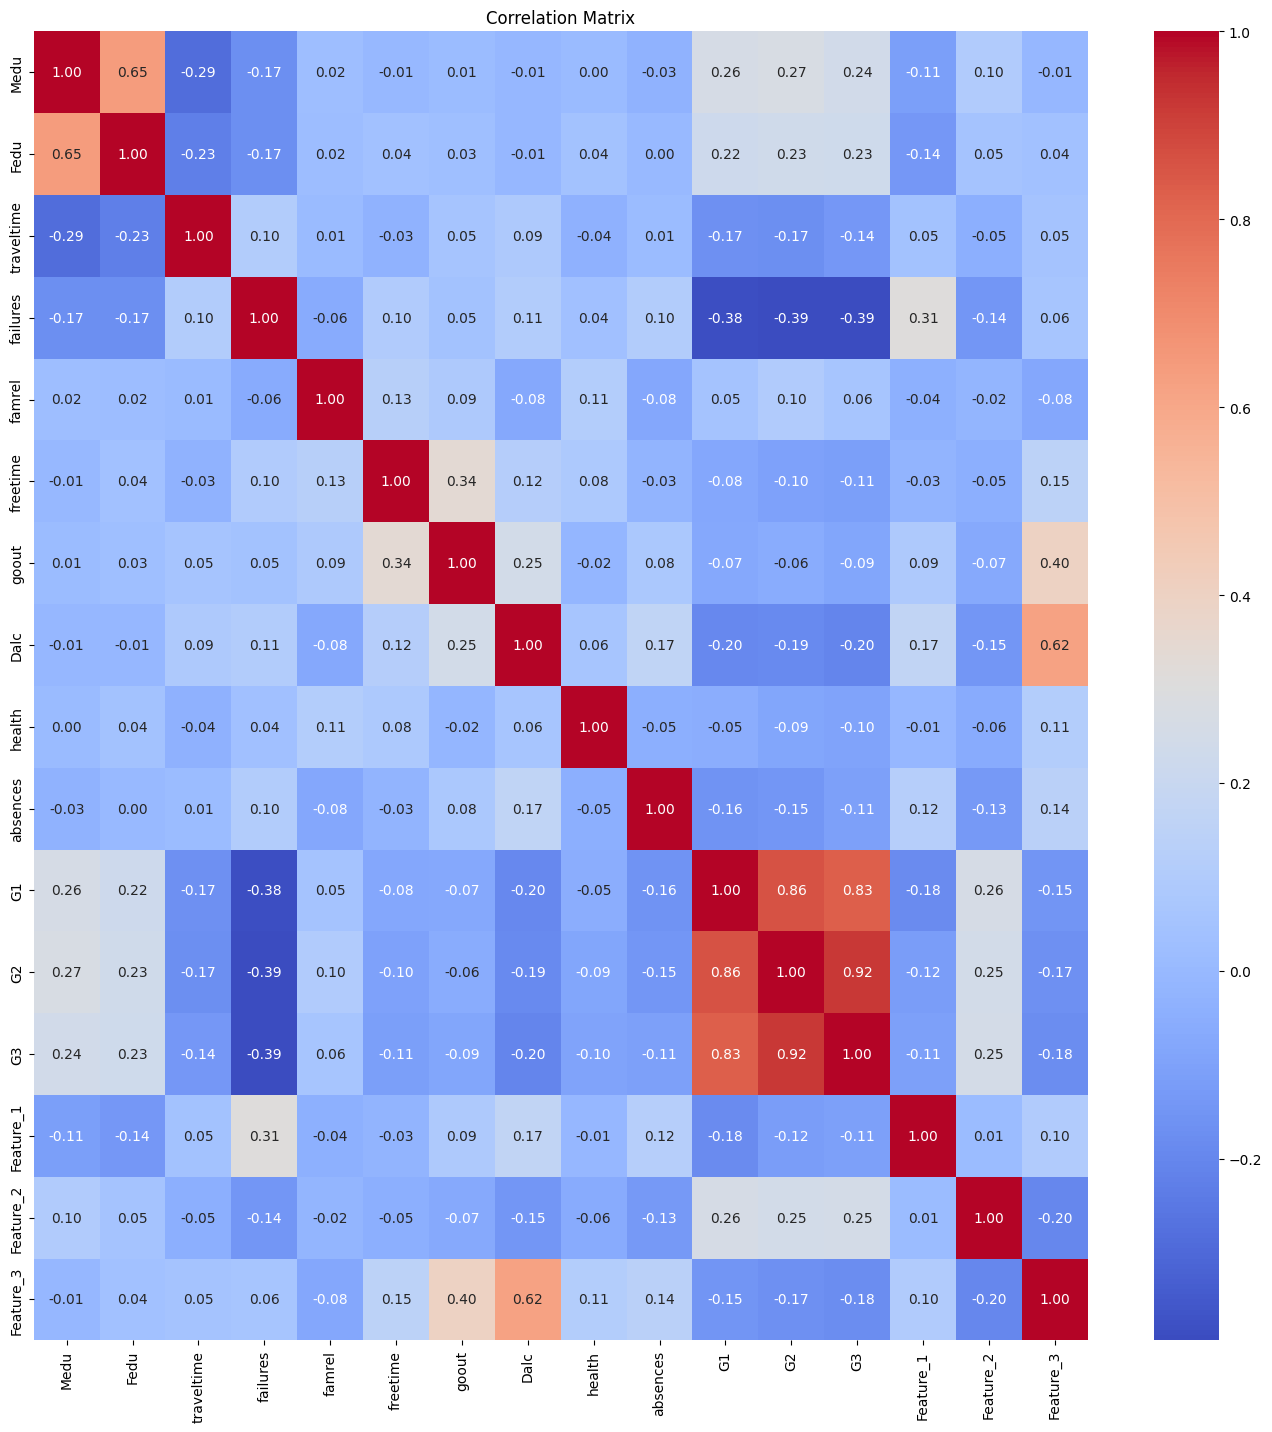

In [1144]:
num_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(17,17))
sns.heatmap(num_df.corr(),annot=True,fmt=".2f",cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

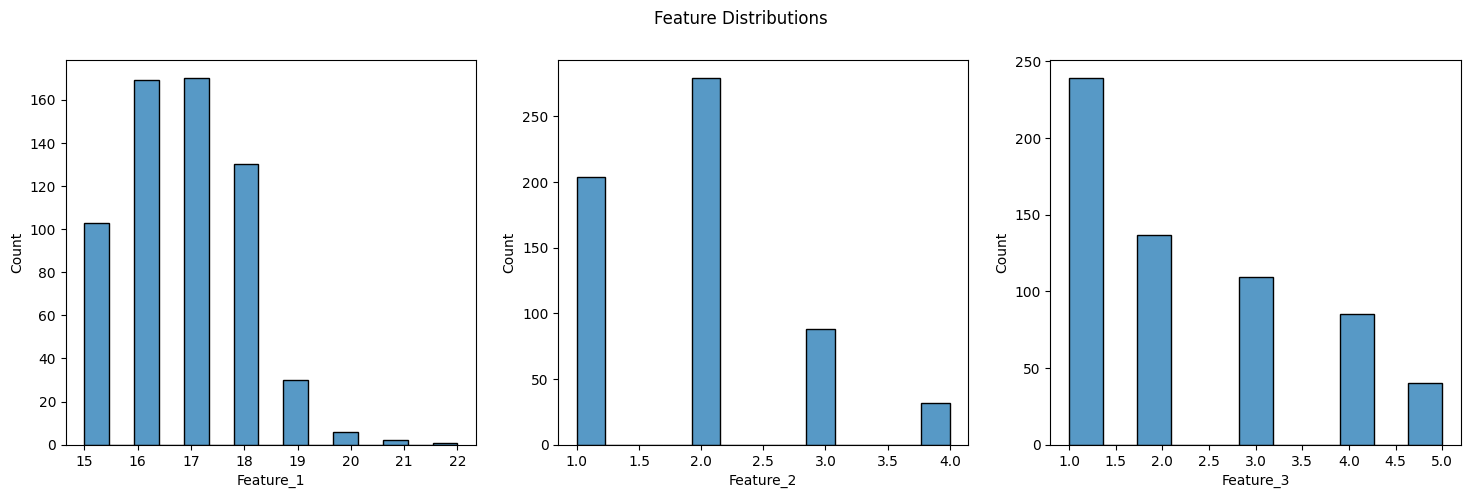

In [1145]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, feature in enumerate(['Feature_1', 'Feature_2', 'Feature_3']):
    sns.histplot(data=df,x=feature,ax=axes[idx],)
plt.suptitle('Feature Distributions')
plt.show()

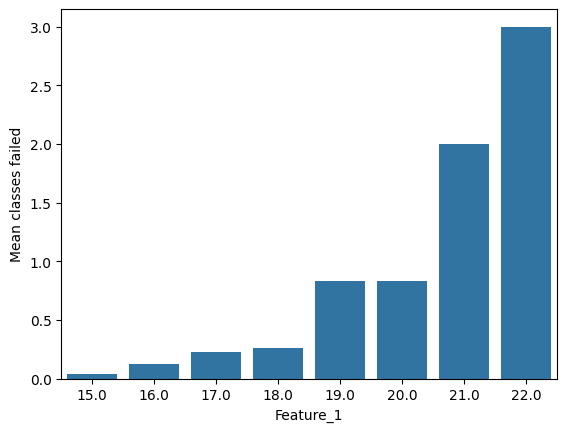

In [1146]:
sns.barplot(data=df,y='failures',x='Feature_1',estimator='mean',ci=None)
plt.xlabel("Feature_1")
plt.ylabel("Mean classes failed")
plt.show()

**Feature_1** likely represents **age**, as the histogram peaks around 15-18 years — consistent with a student population. Additionally, the mean number of failed classes increases with age, suggesting older students have backlogs.


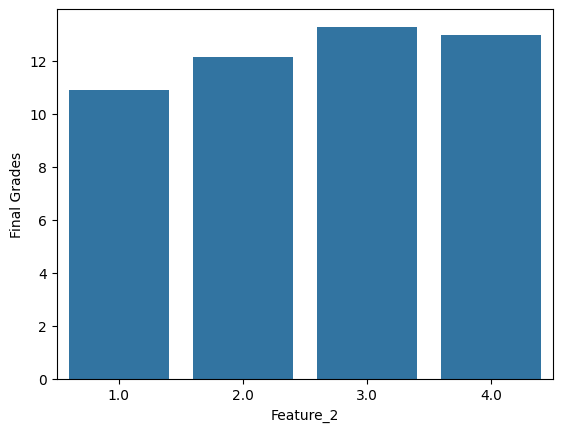

In [1147]:
sns.barplot(data=df,x='Feature_2',y='G3',estimator='mean',ci=None)
plt.xlabel('Feature_2')
plt.ylabel('Final Grades')
plt.show()

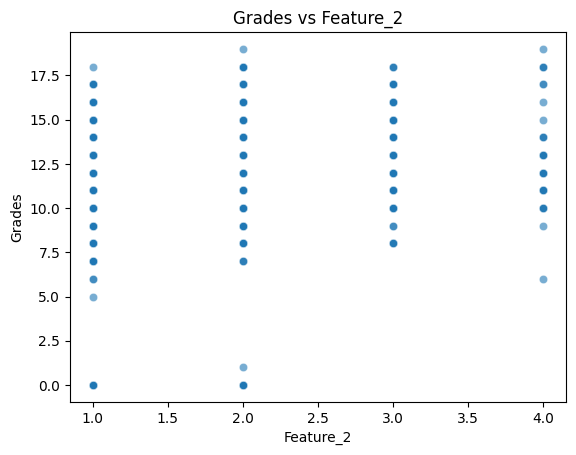

In [1148]:
sns.scatterplot(data=df,x='Feature_2',y= 'G3', alpha=0.6)
plt.xlabel('Feature_2')
plt.ylabel('Grades')
plt.title('Grades vs Feature_2')
plt.show()

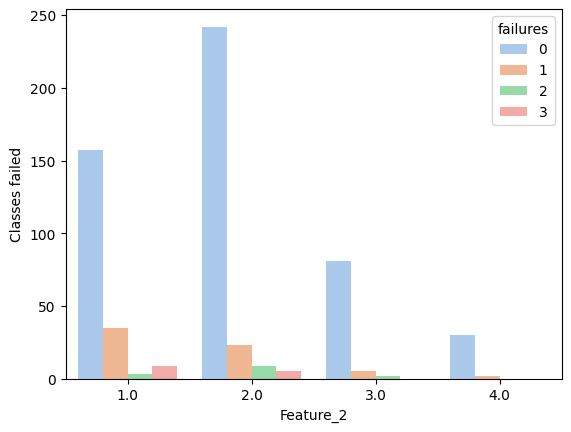

In [1149]:
sns.countplot(data=df,hue='failures',x='Feature_2',palette='pastel')
plt.xlabel("Feature_2")
plt.ylabel("Classes failed")
plt.show()
#sns.barplot(data=df,y='freetime',x='Feature_2')
#plt.xlabel("Feature_2")
#plt.ylabel("avg freetime")
#plt.show()

*  **Feature_2** shows a positive correlation with final grades, and a
negative correlation with failures, Dalc, and absences.
This pattern suggests that Feature_2 could represent **study hours after school**  (range:1-4).

*   The mean final grade increases steadily with higher values of Feature_2, with only a slight dip between levels 3 and 4 — possibly due to burnout or mental fatigue from overstudying.

*  Notably, some of the highest-performing students fall within the highest range of Feature_2, reinforcing its association with academic success.

* Additionally, there is a clear and significant drop in the number of failed classes as Feature_2 increases, further supporting its role as a positive academic behavior indicator.








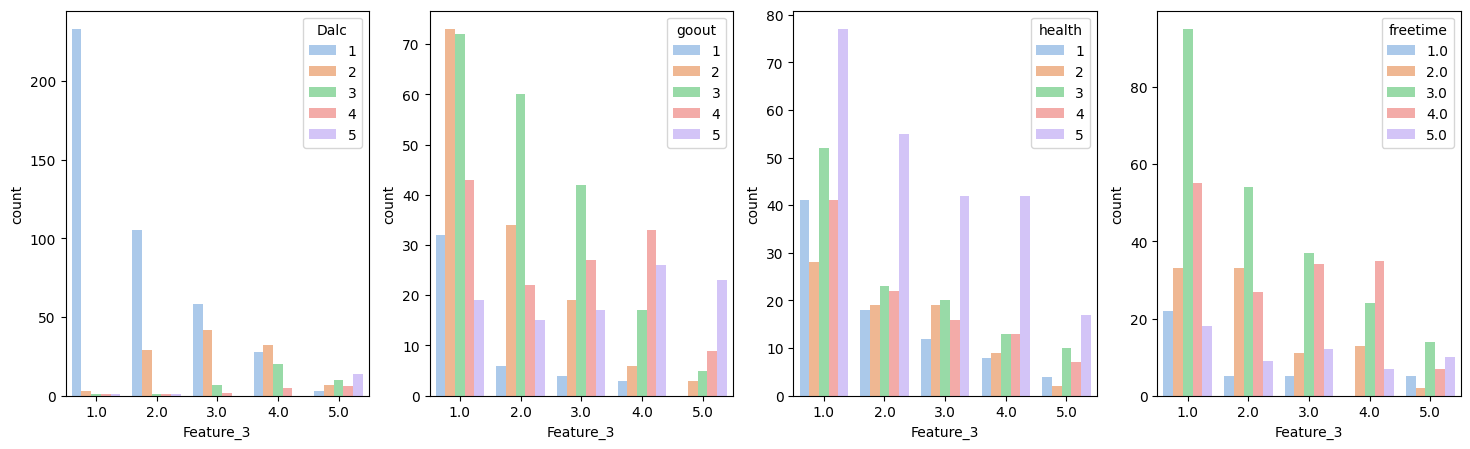

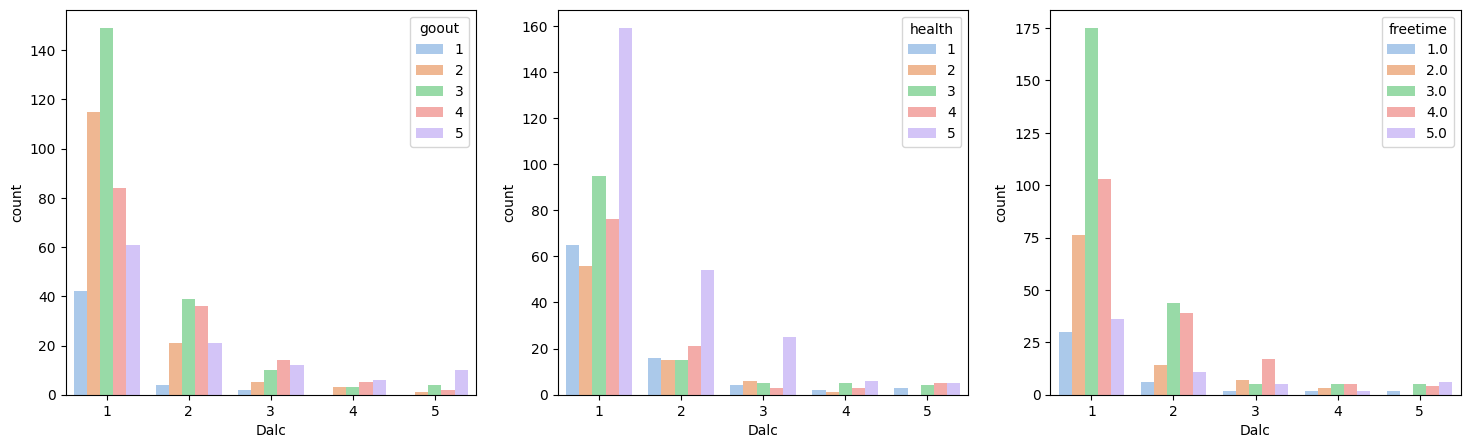

In [1150]:
columns=['Dalc','goout','health','freetime']
fig,axes=plt.subplots(1,len(columns),figsize=(18,5))
for indx,column in enumerate(columns):
    sns.countplot(hue=df[column],x=df['Feature_3'],data=df,ax=axes[indx],palette='pastel')
plt.show()
columns=['goout','health','freetime',]
fig,axes=plt.subplots(1,len(columns),figsize=(18,5))
for indx,column in enumerate(columns):
    sns.countplot(hue=df[column],x=df['Dalc'],data=df,ax=axes[indx],palette='pastel')
plt.show()

In [1151]:
# columns=['goout','health','freetime',]
# fig,axes=plt.subplots(1,len(columns),figsize=(18,5))
# for indx,column in enumerate(columns):
#     sns.barplot(y=df[column],x=df['Dalc'],data=df,ax=axes[indx])
# plt.show()
# columns=['Dalc','health','freetime','goout']
# fig,axes=plt.subplots(1,len(columns),figsize=(18,5))
# for indx,column in enumerate(columns):
#     sns.boxplot(y=df[column],x=df['Feature_3'],data=df,ax=axes[indx])
# plt.show()



*  **Feature_3** has a strong correlation with 'goout and 'Dalc'.

*  Feature_3 could represent **weekday cigarrette consumption** (range 1 to 5).

*  As Feature_3 increases, both Dalc and goout consistently rise, suggesting that students with higher Feature_3 values tend to engage more in substance use and socializing.

*   Additionally, higher Feature_3 values are associated with lower counts of students reporting better health scores(5),indicating a potential negative impact on well-being.




# **LEVEL 2**

In [1152]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

,0
G2,35
Feature_1,38
Feature_3,39
freetime,45
Feature_2,46
famsize,50
absences,69
Fedu,73
traveltime,73
higher,76


In [1153]:
print(df.groupby(['famsize']).count()['sex'])
df['famsize'].fillna(df['famsize'].mode()[0], inplace=True)
print(df.groupby(['famsize']).count()['sex'])

famsize
GT3    424
LE3    175
Name: sex, dtype: int64
famsize
GT3    474
LE3    175
Name: sex, dtype: int64


famsize:
* GT3:424
* LE3:175
* Missing:50

It is a categorical variable.
**Mode imputation** retains the dominant class(GT3 % changes doesnt change much (73% to 75%)). It avoids introducing bias or artificial variation through random  imputation.

In [1154]:

print(df.groupby(['higher']).count()['school'])
df['higher'].fillna(df['higher'].mode()[0], inplace=True)


higher
no      64
yes    509
Name: school, dtype: int64


higher:

* yes:509

* no:64

*  Missing:76

It is a binary categorical variables.
Imputing it with **mode** is preferred as it doesn’t add extra noise or unpredictability to the data.
It sticks to the natural trend of "yes" number being max.

In [1155]:
median_feat=['Feature_1','Feature_2','Feature_3','freetime','absences','Fedu','traveltime']
for feat in median_feat:
    df[feat].fillna(df[feat].median(),inplace=True)

*  For median_feat, I applied median imputation because it is robust to outliers.

*   Most of the features in this set are ordinal or categorical in nature, where using the mean would be inappropriate and would not make sense. In contrast, the median better preserves the ordinal structure of these variables.
  
* For truly continuous features like age, the median still provides a stable central value without being skewed by anomalies.


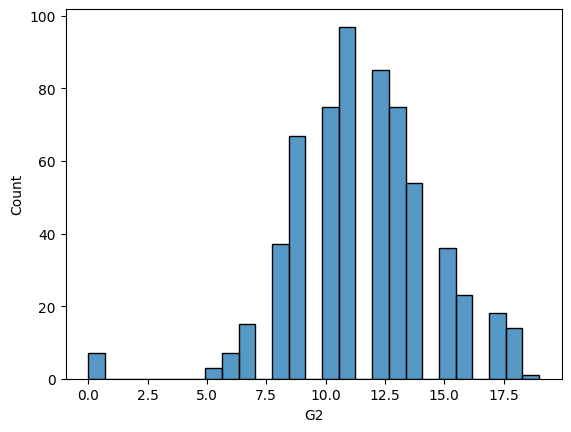

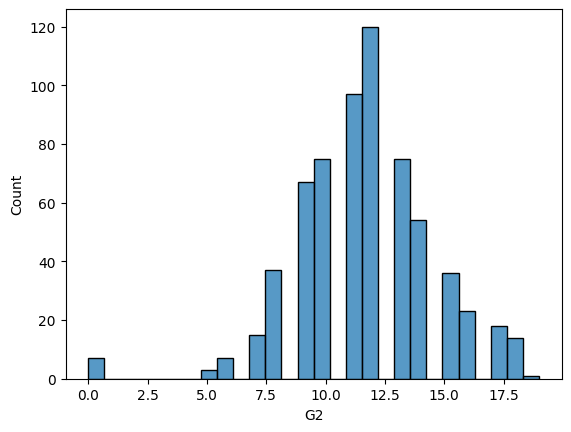

In [1156]:
sns.histplot(df['G2'])
plt.show()
df['G2'].fillna(df['G2'].mean(),inplace=True)
sns.histplot(df['G2'])
plt.show()

* G2 follows a near normal distribution, mean would presereve shape.
* Median could underpresent the higher or lower scores.

Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left)

In [1157]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

,0


# **LEVEL 3**

How does gender effect romantic relationship status?



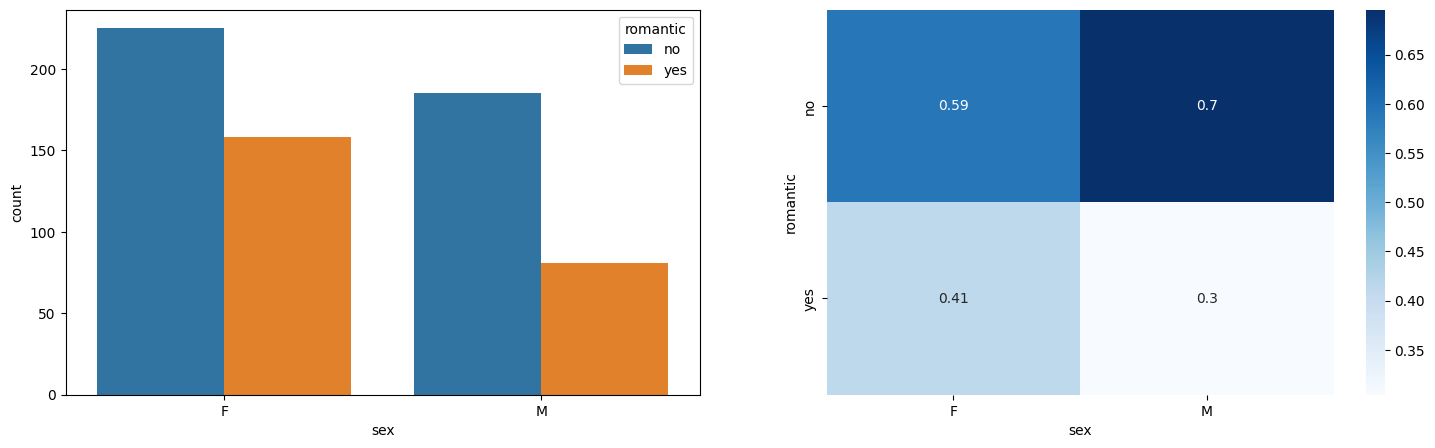

In [1158]:
figure,axes=plt.subplots(1,2,figsize=(18,5))
sns.countplot(x='sex',hue='romantic',data=df,ax=axes[0])
ct = pd.crosstab(df['romantic'], df['sex'], normalize='columns')
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()

The above graphs suggest:
* Female students are more likely to be in a romantic relationship than male students.
* Male and Female students have a higher proportion of not being in a relationship than being in one.
___

Does relationship status affect grades?

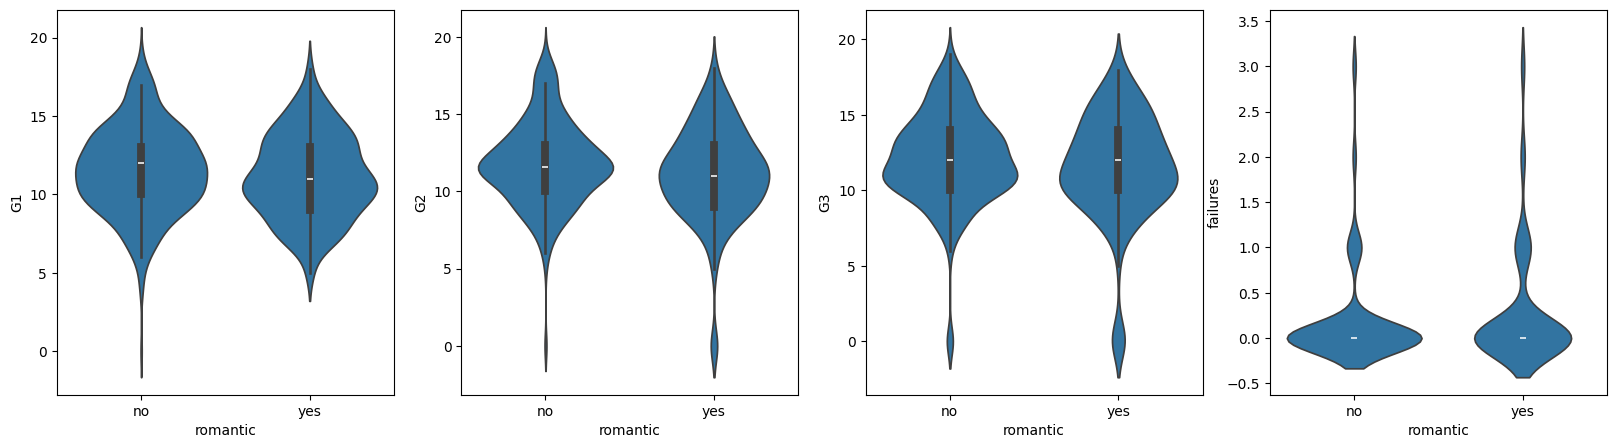

In [1159]:
fig,axes=plt.subplots(1,4,figsize=(20,5))
acad=['G1','G2','G3','failures']
for indx,grade in enumerate(acad):
    sns.violinplot(y=df[grade],x=df['romantic'],ax=axes[indx])
plt.show()

Based on the violin plots for all three grades and number of failures, romantic relationship status does not significantly affect academic performance or failure rates. The grade distributions and outlier behaviors are almost identical across both groups.
___

How does abcenses correlate with Dalc and Feature 3(ciggarette use)?

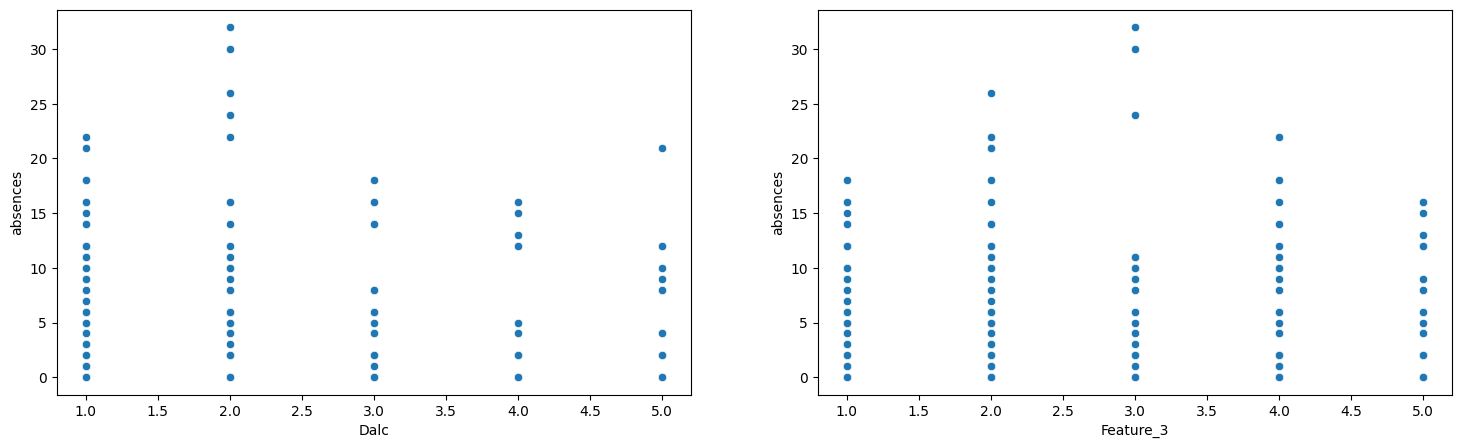

In [1160]:
bad_things=['Dalc','Feature_3']
fig,axes=plt.subplots(1,len(bad_things),figsize=(18,5))
for indx,bad_thing in enumerate(bad_things):
    sns.scatterplot(x=df[bad_thing],y=df['absences'],ax=axes[indx])
plt.show()

* Students with moderate alcohol consumption (Dalc = 2 or 3) exhibit a wider spread in absences, including some of the highest recorded values. A similar trend is observed among students with moderate cigarette usage, indicating that regular (but not extreme) substance users may be more likely to skip school or face lifestyle-related disruptions.
* Interestingly, students with very high levels of alcohol (Dalc = 4 or 5) or cigarette use (Feature_3 = 5) do not consistently show high absenteeism. This might be attributed to fewer data points in these extreme categories or unique behavioral patterns among these students.
___

Does studytime and tutions affect grades?

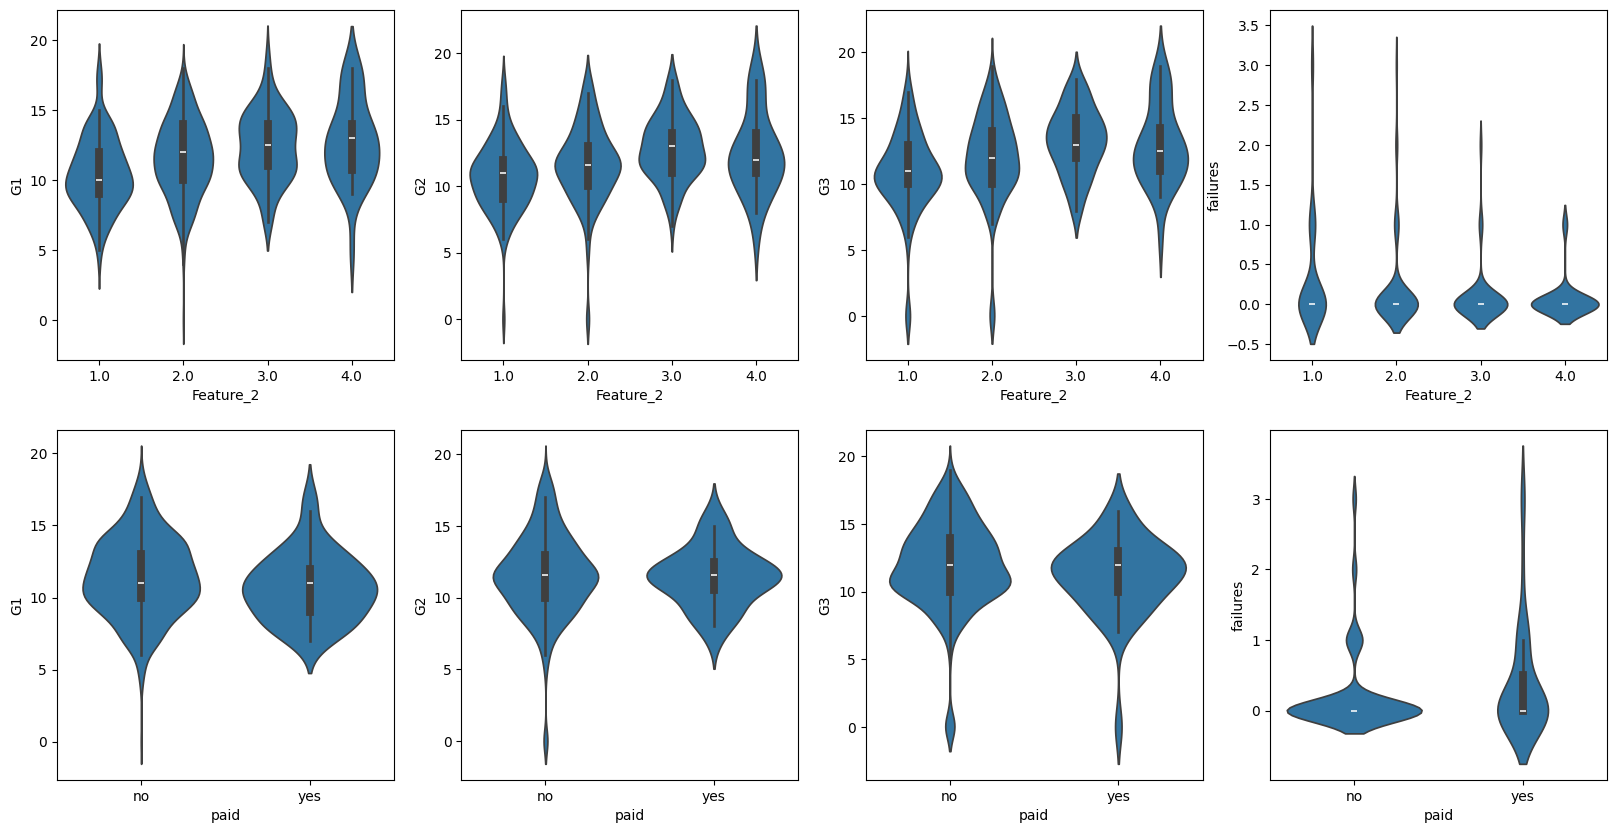

In [1161]:
list=['Feature_2','paid']
fig, axes = plt.subplots(len(list), len(acad), figsize=(20, 10))
for i, feature in enumerate(list):
    for j, a in enumerate(acad):
        sns.violinplot(x=feature, y=a, data=df, ax=axes[i, j])
plt.show()



studytime:
* Across all graphs, higher levels of studytime are associated with a slight increase in median grades.
* Additionally, as studytime increases, the number of outliers decreases, indicating more consistent academic performance among students who dedicate more time to studying.
* Notably, failures are more concentrated near zero in the higher studytime categories, with fewer outliers, suggesting a clear link between increased study effort and reduced course failures.

Given that these are school students, the academic rigor may not be extremely high, and therefore, increased study hours may not always translate into significantly higher grades. However, it is evident that students who invest more time in studying are considerably less likely to fail, highlighting the value of consistent academic effort even if it doesn't drastically impact top-end performance. The highest grades however are acheived by those who study the most hours.

paid:
* Paid tutoring doesn’t change the median grades or overall spread, but it does cut down on very low scores and failures. In other words, tuition raises the performance floor rather than the ceiling—helping at-risk.
___


How does family relationship affect romantic status?

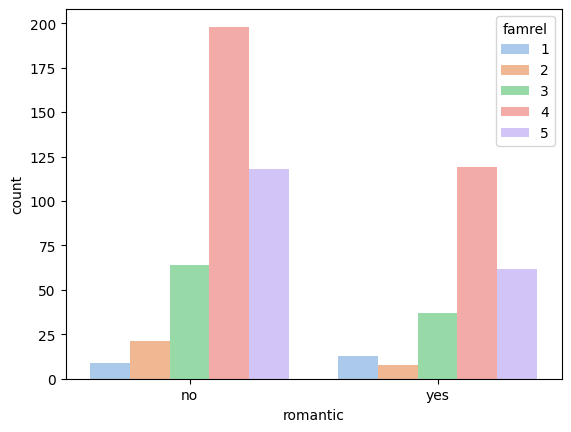

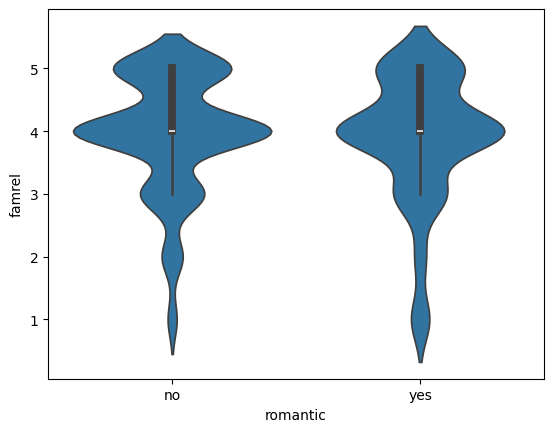

In [1162]:
sns.countplot(data=df,hue='famrel',x='romantic',palette='pastel')
plt.show()
sns.violinplot(y='famrel',x='romantic',data=df)
plt.show()

famrel shows only a slight difference between students who are and aren’t in a romantic relationship. Both groups share the same median rating and similar interquartile ranges, indicating largely overlapping experiences . The violin plot reveals that students in relationships exhibit a marginally heavier lower tail—more instances of weaker family ties—whereas very low famrel scores are less common among singles .
___

# **LEVEL 4**

In [1163]:
# nominal=['school','guardian','Mjob','Fjob','reason']
# ordinal=['sex','address','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famsize']
#print(len(df.columns)-len(num_df.columns))
#print(len(nominal)+len(ordinal))
# df=pd.get_dummies(df,columns=nominal,drop_first=True)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
  df[col]=le.fit_transform(df[col])

In [1164]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [1165]:
# scale_cols=['G1','G2','G3','Feature_1','absences']
# from sklearn.preprocessing import RobustScaler
# scaler=RobustScaler()
# for col in scale_cols:
#   x[col]=scaler.fit_transform(x[[col]])
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
for col in x.columns:
  x[col]=normalizer.fit_transform(x[[col]])
# from sklearn.decomposition import PCA
# pca_obj = PCA()
# x= pca_obj.fit_transform(x).round(3)

In [1166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [1167]:
# from sklearn.linear_model import LogisticRegression
# classifier=LogisticRegression()
# classifier.fit(X_train,y_train)
# predictions=classifier.predict(X_test)
# score=classifier.score(X_test,y_test)
# print(score)
#score was coming like 57%
# from sklearn import metrics
# cm=metrics.confusion_matrix(y_test,predictions)
# sns.heatmap(cm,annot=True,fmt='.3f',cmap='Blues_r')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted Label')
# plt.show()
# from sklearn.metrics import accuracy_score,classification_report
# print(classification_report(predictions,y_test))

from sklearn.linear_model import LogisticRegression
log_classif=LogisticRegression()
#tried hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[i for i in range(1,100,50)],'max_iter':[100,200,300,400,500,600,700,800,900,1000]}
log_reggr=GridSearchCV(log_classif,param_grid=parameter,scoring='accuracy',cv=5)
log_reggr.fit(X_train,y_train)
log_reggr=log_reggr.best_estimator_

In [1168]:
logreggr_ypred=log_reggr.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
score1=accuracy_score(logreggr_ypred,y_test)
print("Logistic Regression score:",100*score1)


Logistic Regression score: 61.53846153846154


In [1169]:
print(classification_report(logreggr_ypred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       107
           1       0.22      0.48      0.31        23

    accuracy                           0.62       130
   macro avg       0.54      0.56      0.52       130
weighted avg       0.74      0.62      0.66       130



In [1170]:
df.corr(numeric_only=True)['romantic'].sort_values(ascending=False)

,romantic
romantic,1.000000
Feature_1,0.177722
guardian,0.106190
absences,0.088676
school,0.072241
failures,0.069901
Dalc,0.062042
activities,0.057517
Feature_2,0.048487
internet,0.034832


In [1171]:
from sklearn.tree import DecisionTreeClassifier
dt_classif=DecisionTreeClassifier()
parameter={'criterion':["gini", "entropy", "log_loss"],'splitter':['best','random']}
dt_reggr=GridSearchCV(dt_classif,param_grid=parameter,scoring='accuracy',cv=5)
dt_reggr.fit(X_train,y_train)
dt_reggr=dt_reggr.best_estimator_
dt_y_pred=dt_reggr.predict(X_test)
dt_score=accuracy_score(dt_y_pred,y_test)
print("Decision Tree score:",100*dt_score)

Decision Tree score: 54.61538461538461


In [1172]:
from sklearn.ensemble import RandomForestClassifier
rf_classif=RandomForestClassifier()
parameter={'n_estimators':[50,100,200,300,400,500],'criterion':["gini", "entropy", "log_loss"]}
rf_reggr=GridSearchCV(rf_classif,param_grid=parameter,scoring='accuracy',cv=5)
rf_reggr.fit(X_train,y_train)
rf_reggr=rf_reggr.best_estimator_

In [1173]:
rf_y_pred=rf_reggr.predict(X_test)
rf_score=accuracy_score(rf_y_pred,y_test)
print("Random Forest score:",100*rf_score)

Random Forest score: 56.15384615384615


In [1174]:
from sklearn.neighbors import KNeighborsClassifier
knn_classif=KNeighborsClassifier()
knn_parameter={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
knn_regg=GridSearchCV(knn_classif,param_grid=knn_parameter,scoring='accuracy',cv=5)
knn_regg.fit(X_train,y_train)
knn_regg=knn_regg.best_estimator_

In [1175]:
knn_ypred=knn_regg.predict(X_test)
knn_score=accuracy_score(knn_ypred,y_test)
print("KNN score:" ,100*knn_score)

KNN score: 59.23076923076923


In [1176]:
from sklearn.naive_bayes import GaussianNB
gnb_classif=GaussianNB()
gnb_regg=gnb_classif
gnb_regg.fit(X_test,y_test)
gnb_ypred=gnb_regg.predict(X_test)
gnb_score=accuracy_score(gnb_ypred,y_test)
print("Gaussian Naive Bayes score:",100*gnb_score)

Gaussian Naive Bayes score: 69.23076923076923


In [1177]:
from sklearn.naive_bayes import MultinomialNB
mnb_classif=MultinomialNB()
mnb_regg=mnb_classif
mnb_regg.fit(X_test,y_test)
mnb_ypred=mnb_regg.predict(X_test)
mnb_score=accuracy_score(mnb_ypred,y_test)
print("Multinomial Naive Bayes score:",100*mnb_score)

Multinomial Naive Bayes score: 66.15384615384615


In [1178]:
from sklearn.naive_bayes import BernoulliNB
bnb_classif=BernoulliNB()
bnb_regg=bnb_classif
bnb_regg.fit(X_test,y_test)
bnb_ypred=bnb_regg.predict(X_test)
bnb_score=accuracy_score(bnb_ypred,y_test)
print("Bernoulli Naive Bayes score:",100*bnb_score)

Bernoulli Naive Bayes score: 73.07692307692307


# **LEVEL 5**

 Accuracy:  62.30769230769231 for model Logistic Regression
 Accuracy:  58.46153846153847 for model Decision Trees
 Accuracy:  58.46153846153847 for model Random Forest
 Accuracy:  59.23076923076923 for model KNN
 Accuracy:  62.30769230769231 for model Gaussian Naive Bayes
 Accuracy:  63.07692307692307 for model Multinomial Naive Bayes
 Accuracy:  63.84615384615384 for model Bernoulli Naive Bayes


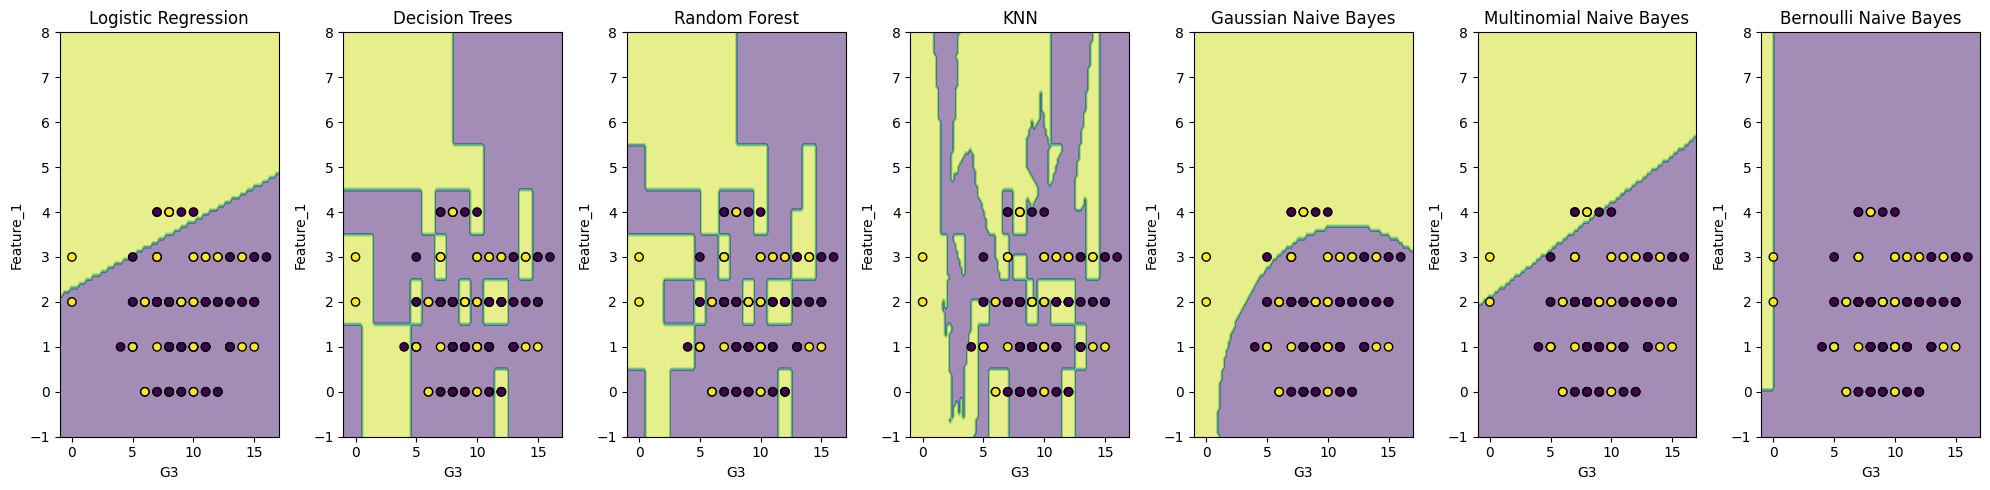

In [1179]:
from sklearn.inspection import DecisionBoundaryDisplay
features=['G3','Feature_1']
x1=df.loc[:,features]
y1=df.loc[:,'romantic']
X1_train,X1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)
list_of_classifiers=[log_classif,dt_classif,rf_classif,knn_classif,gnb_classif,mnb_classif,bnb_classif]
index={0:'Logistic Regression',1:'Decision Trees',2:'Random Forest',3:'KNN',4:'Gaussian Naive Bayes',5:'Multinomial Naive Bayes',6:"Bernoulli Naive Bayes"}
fig, axs = plt.subplots(1, len(index), figsize=(20, 5))
for indx, classif in enumerate(list_of_classifiers):
    classif.fit(X1_train, y1_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        classif, X1_train, response_method="predict",
        ax=axs[indx],
        xlabel=features[0], ylabel=features[1],
        alpha=0.5
    )
    axs[indx].scatter(X1_test.iloc[:, 0], X1_test.iloc[:, 1], c=y1_test, edgecolor="k")
    axs[indx].set_title(f"{index[indx]}")
    print(" Accuracy: ",100*accuracy_score(classif.predict(X1_test), y1_test),"for model",index[indx])

plt.tight_layout()
plt.show()

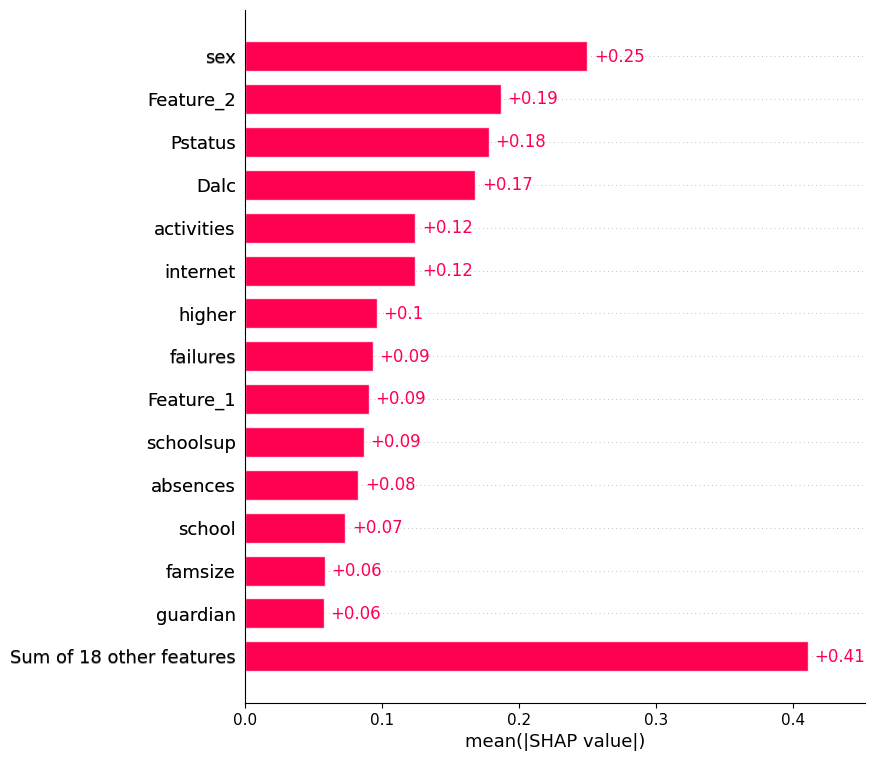

In [1180]:
import shap
explainer = shap.Explainer(log_reggr,X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values,max_display=15)
plt.show()

0
1


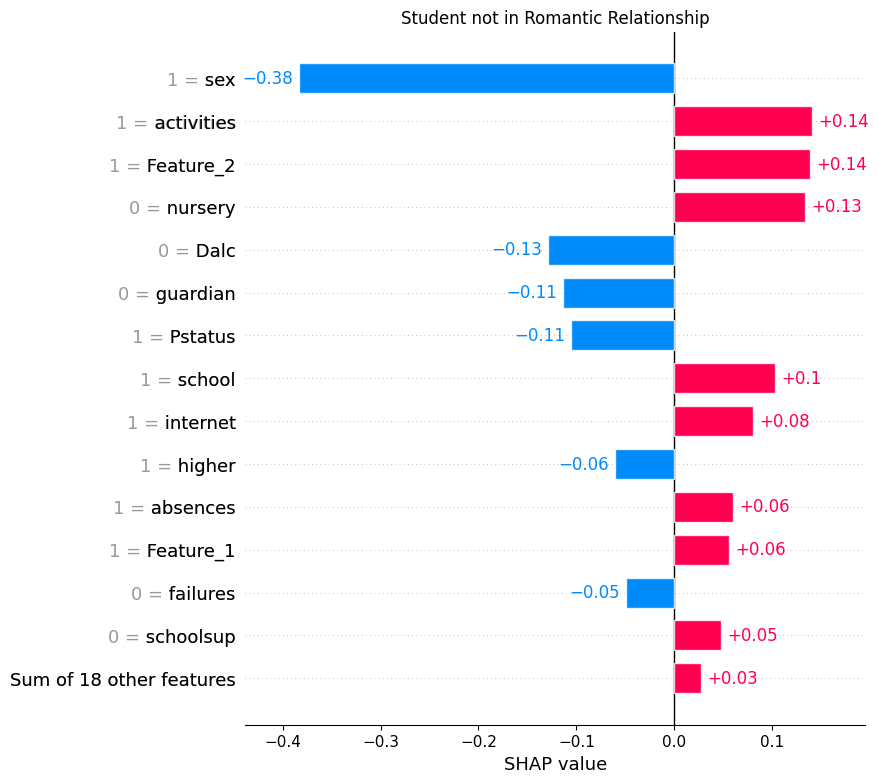

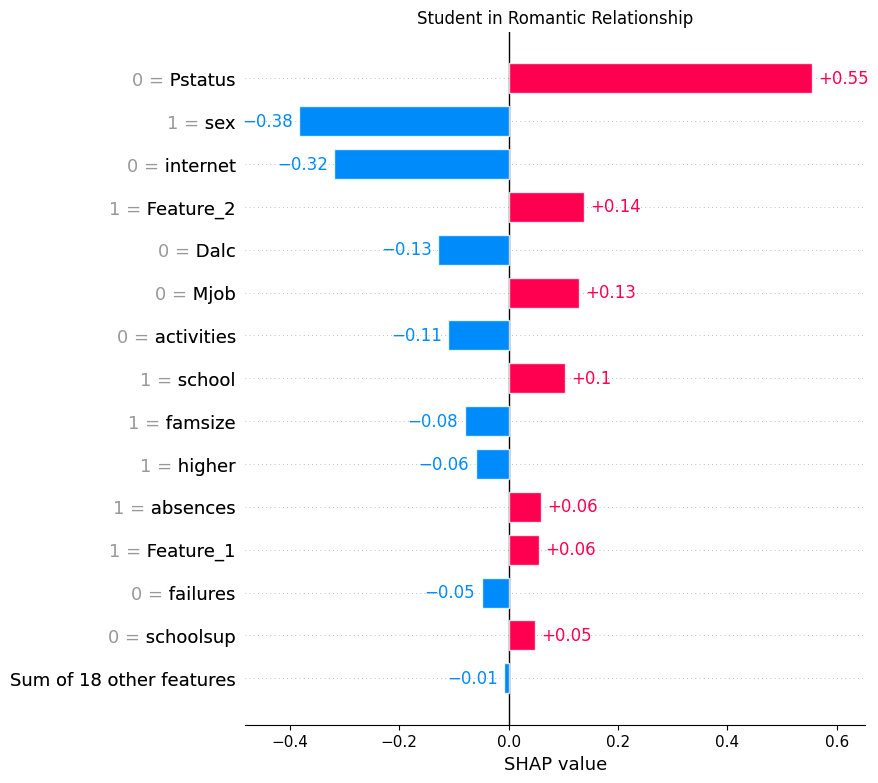

In [1181]:
print(y[0])
print(y[3])
plt.title('Student not in Romantic Relationship')
shap.plots.bar(shap_values[0],max_display=15)
plt.title('Student in Romantic Relationship')
shap.plots.bar(shap_values[3],max_display=15)

The key drivers of relationship prediction are:

1. Feature-2 (Study Hours): Students who study more tend to be in relationships slightly more, possibly reflecting better time management or maturity.

2. Sex: Gender matters; females are more likely to be in relationships in this dataset.

3. Parental Cohabitation (Pstatus): Students from stable home environments show higher relationship likelihood.

4. Social Behavior: Being socially active (e.g., going out, drinking, participating in activities) is linked to higher chances of being in a relationship.

In simple terms, students who are socially active, and come from stable homes are more likely to be in relationships.